> Making Datas Classifier
> =
>
> ## 1. 목적 및 의의
> ## 2. 데이터 준비 및 살펴보기
> ## 3. 데이터 구분: train, validation 용도에 맞춰 나누기
> ## 4. 머신러닝 모델 학습 및 평가
> ## 5. 정확도 분석을 통한 적절한 모델 선택



# 1. 목적 및 의의

### 숫자, 와인, 유방암의 자료를 분석해보고, 정보들을 기준으로 구분하는 머신러닝 모델을 구현하겠습니다. 뛰어난 성능을 기대하기보다는 여러가지 자료를 다뤄보고, 데이터 분석을 위해 여러 모델을 사용해본 후, 데이터에 따라 어떤 모델을 사용하는 것이 적합할지 확인해볼 예정입니다.

# 2. 데이터 준비 및 살펴보기

 - ## 데이터 준비: (데이터 준비 부터는 [Digits](#digits), [Wine](#wine), [Breast cancer](#breast-cancer) 나눠서 진행하겠습니다. 해당 위치를 클릭하세요.)
    


## Digits


In [30]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

digits = load_digits()

 - 데이터 분석
 먼저 데이터를 출력해보겠다.

In [31]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

### 조금 길지만, digits데이터는 dictionary형태로 생김이 확인된다.
### 이어서 key값을 확인해보겠다.

In [32]:
print(digits.keys()) 

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


### 위에도 어렴풋이 보이는 키값들이 나온다. data는 행렬 형태로 정수 값들이 들어있는 것으로 보이며, DESCR은 무언가의 설명으로 보인다. 정보를 파악할 필요가 있으므로, DESCR부터 출력해보겠다.

In [33]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### 숫자 손글씨에 대한 시각적 인식을 위한 자료이다. 이는 Nist의 자료에서 가져온 데이터로, 30명의 손글씨로 train하고, 13명의 손글씨로 test를 할 수 있도록 제공하고 있다. 32x32의bit-map을 4x4크기 단위로 묶어서 데이터 크기를 $\frac{1}{16}$ 로 줄였다. 이로 학습 속도를 높이고, 여러가지 모델을 확인해보기 좋게 되어있다. 이러한 내용들이 나와있다.

### 이어서 각 항목에 대한 자료는 다음과 같다.

In [34]:
print(digits.data)  # 8x8 그림으로 예상된다.

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


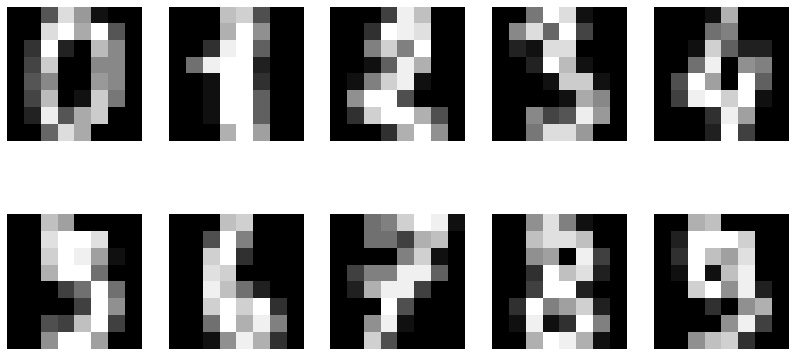

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize= (14,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.data[i].reshape(8,8),cmap='gray')
    plt.axis('off')
plt.show() 

해상도를 조금 포기했지만, 어렴풋이 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 임을 확인 할 수 있다.

In [36]:
print(digits.target)
print(digits.target.shape)

[0 1 2 ... 8 9 8]
(1797,)


위 사진자료에 대한 정답지로 생각할 수 있겠습니다.

In [37]:
print(digits.frame)                       # 아무것도 들어있지 않다.
print(digits.feature_names)               # 픽셀의 각 자리의 이름이 들어있다.

None
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


각 픽셀의 이름이 들어있으니, 사용해보도록 하겠습니다.

In [38]:
digits.frame = pd.DataFrame(digits.data,columns=digits.feature_names)
digits.frame.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### 원하던대로, DataFrame이 생성된 것을 확인할 수 있습니다. 이제 정답까지 매칭시켜 보겠습니다.

In [39]:
digits.frame['target'] = digits.target.astype(str)
digits.frame.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [40]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


target_names는 사진자료가 무엇으로 분류될 수 있는지 범주를 제공합니다.

In [41]:
print(digits.images)
print("digits.images.shape:", digits.images.shape, "\tdigits.data.shape",digits.data.shape)
print("digits.images:", type(digits.images), "\tdigits.data:", type(digits.data))

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

### 왜인지 data와 겹치게, images 데이터가 또 있습니다. 자세히 보니 data는 images의 $8 \times 8$ 크기의 자료를 계산에 다루기 쉽게, $1 \times 64$ 의 행렬로 펴준 상태인 것으로 보여요. 이미지 자료 출력으로는 images, 머신러닝 모델 학습에는 data를 활용하도록 하겠습니다.



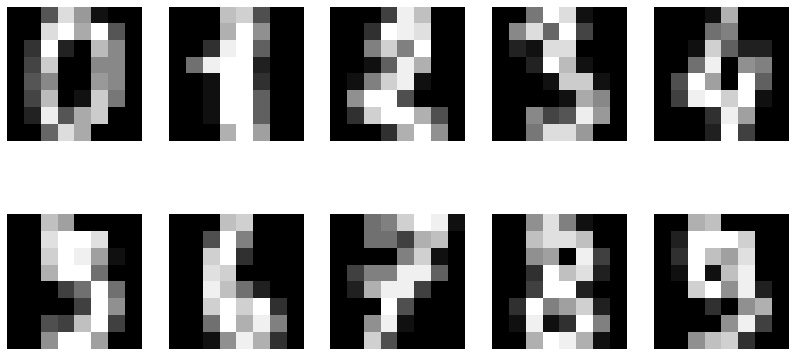

In [42]:
plt.figure(figsize= (14,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i],cmap='gray')
    plt.axis('off')
plt.show() 

### 앞에서 digits.data를 reshape해서 출력한 이미지와 완전히 일치하네요. 앞에서 한 가정이 올바름을 알 수 있습니다.


# 3. 데이터 구분

### 이제 digits의 데이터를 머신러닝 모델 학습에 사용할 수 있도록 가공하겠다. 다만 제공되는 digits.data에서 이미 $ 8 \times 8$ 데이터를 한줄로 펴주었으니, 그대로 활용하도록 하겠다.
### 현재 1797개의 손글씨가 digits.data에 $64 \times 1$ 형태로 들어있고, 그 수의 숫자가 digits.target에 들어있다. 그러므로 이 두 정보를 학습시키는데에, 또 성능을 검사하는데에도 사용할 수 있다. 하지만, 학습한 데이터로 성능을 검사한다면, 답지를 주고 시험을 보는 것과 다를 것이 없기때문에, 인공지능의 성능을 올바로 평가할 수 없다. 따라서 이 두 데이터를 각각 다시 둘로 나눠 생각하도록 하겠다. digits.data를 x_train, x_test, digits.target을 y_train, y_test로 나누도록 하겠다.

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,
                            digits.target,
                            test_size=0.2,
                            random_state=21) 

# random_state를 보면 알 수 있듯이, train_test_split함수가 데이터를 무작위하게 나누어 준다.

# 4. 머신러닝 학습 및 평가

기다렸던 대망의 머신러닝 모델입니다. 가장 중요한 부분이라고 할 수 있죠. 본 글에서 제가 다뤄볼 모델은 5가지 입니다.
 1. ### Decision Tree Classifier      
 2. ### Random Forest Classifier     
 3. ### Support Vector Mechine Classifier    
 4. ### Stochastic Gradient Descent Classifier    
 5. ### Logistic Regression Classifier     

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


```python
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,
                            digits.target,
                            test_size=0.2,
                            random_state=21) 
```
### 위와같이 훈련 및 실험 자료를 준비했었습니다.


In [45]:
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_svc = SVC()
model_sgdc = SGDClassifier()
model_logistic = LogisticRegression()


model_tree.fit(x_train,y_train)
model_forest.fit(x_train,y_train)
model_svc.fit(x_train,y_train)
model_sgdc.fit(x_train,y_train)
model_logistic.fit(x_train,y_train)

/home/hchang/Working/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### scikit learn이 제공하는 간단한 식으로 모델을 정의 및 학습시켰습니다. 이제 그 성능을 확인해보겠습니다.

In [46]:
y_pred1=model_tree.predict(x_test)
y_pred2=model_forest.predict(x_test)
y_pred3=model_svc.predict(x_test)
y_pred4=model_sgdc.predict(x_test)
y_pred5=model_logistic.predict(x_test)


### 위와같이 예상 데이터를 만들어서 미리 준비한 y_test와 비교하여 정확도를 비교하겠습니다. 

In [47]:
# print(accuracy_score(y_test,y_pred1))
# print(accuracy_score(y_test,y_pred2))
# print(accuracy_score(y_test,y_pred3))
# print(accuracy_score(y_test,y_pred4))
# print(accuracy_score(y_test,y_pred5))  이와같이 확인 가능하지만, 보기 좋게 정리해서 출력해보겠습니다.

In [48]:
import re
y_predset=[("DecisionTreeClassifier",y_pred1),("RandomForestClassifier",y_pred2),("SVC",y_pred3),("SGDClassifier",y_pred4),("LogisticRegression",y_pred5)]
for i,j in y_predset:
    print(i+"의 accuracy는", " "*(25-len(i)-len(re.findall('[가-힣]',i))) ,format(accuracy_score(y_test,j),".5f"), "입니다.")

DecisionTreeClassifier의 accuracy는     0.83333 입니다.
RandomForestClassifier의 accuracy는     0.97222 입니다.
SVC의 accuracy는                        0.98611 입니다.
SGDClassifier의 accuracy는              0.96389 입니다.
LogisticRegression의 accuracy는         0.97778 입니다.


### 결과는 위와 같군요. 그렇다면, SVC 즉 support vectormachine이 손글씨를 분류하기 가장 적합한 모델일까요?
### 반드시 그렇다고 할 수는 없습니다. 아래를 같이 확인해봅시다.

In [49]:
for i,j in y_predset:
    print("#",i+"의 Confusion Matrix")
    print(confusion_matrix(y_test, j))

# DecisionTreeClassifier의 Confusion Matrix
[[30  0  0  0  1  0  0  1  0  0]
 [ 0 26  0  2  2  0  0  0  3  3]
 [ 0  2 22  2  1  1  0  0  2  0]
 [ 0  0  0 34  0  1  0  1  3  2]
 [ 0  0  0  1 26  0  1  2  1  1]
 [ 0  0  1  0  0 41  2  0  2  0]
 [ 0  0  0  1  1  1 29  0  0  0]
 [ 0  0  0  0  0  0  0 37  1  2]
 [ 0  0  1  2  0  1  0  1 34  3]
 [ 1  0  0  2  2  0  0  1  2 21]]
# RandomForestClassifier의 Confusion Matrix
[[30  0  0  0  2  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  1]
 [ 0  0  0  0 31  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 1  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  1  0  0  0  0  1 39  0]
 [ 0  0  0  1  0  0  0  0  1 27]]
# SVC의 Confusion Matrix
[[31  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  

In [50]:
for i,j in y_predset:
    print("-"*(18-len(i)//2),i+"의 Classification Report","-"*(18-len(i)//2))
    print(classification_report(y_test, j))

------- DecisionTreeClassifier의 Classification Report -------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.93      0.72      0.81        36
           2       0.92      0.73      0.81        30
           3       0.77      0.83      0.80        41
           4       0.79      0.81      0.80        32
           5       0.91      0.89      0.90        46
           6       0.91      0.91      0.91        32
           7       0.86      0.93      0.89        40
           8       0.71      0.81      0.76        42
           9       0.66      0.72      0.69        29

    accuracy                           0.83       360
   macro avg       0.84      0.83      0.83       360
weighted avg       0.84      0.83      0.83       360

------- RandomForestClassifier의 Classification Report -------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
        

# 5. 정확도 분석을 통한 적절한 모델 선택

### 머신러닝 모델을 평가하는 데에는 여러가지 방법이 있습니다.
### 먼저 아래 그림을 살펴봅시다.

![confusion matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)    
|출처|[https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)|    
|---:|:---|

### 위 그림과 같이 어떤 결과를 예측하는 모델을 평가하는 데에는 Precision, Negative Predictive Value, Sensitivity(=Recall), Specificity, Accuracy 등과 같은 여러 척도가 존재합니다.

![score](accuracy.png)   

### 손글씨 데이터를 예측한 모델은 실제 글씨를 얼마나 맞추었는지, 즉 Sensitivity가 가장 중요합니다.
### 따질 것도 없이 SVC 모델이 여러 정확도 지표가 가장 높습니다. SVC 모델로 판별하는 것이 가장 좋겠습니다:)

# Wine

[\[목차\]](#making-datas-classifier)

## 3. 데이터 준비하기 및 살펴보기

In [57]:
from sklearn.datasets import load_wine
wine = load_wine()


### 이제 위에서와 같이 데이터를 하나하나 뜯어보겠습니다!

In [52]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [60]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

### 똑같이 하려니 지루한 면이 있네요. 필요한 내용을 함수로 만들어서 진행해볼게요:)

In [83]:
class load_data:
    def __init__(self,data):
        self.datas = data()

    def graph(self,n):
        plt.figure(figsize=(14,7))
        for i in range(n):
            plt.subplot(1,n,i+1)
            plt.imshow(self.images[i])
            plt.axis('off')
        plt.show()

    def datafra(self,what = None):
        self.frame = pd.DataFrame(self.datas.data,columns=self.datas.feature_names)
        print(self.frame.head())
        
wine = load_data(load_wine)
wine.datafra()

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

### 적절히 동작하는 군요! 하지만 먼저 데이터 분석에 중점을 두겠습니다.

In [86]:
wine = load_wine()
wine_df=pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df['target']= wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
### 와인의 각 성분값이 분류되어 있습니다. 이것으로 와인을 구분하겠습니다.

In [88]:
print(wine.DESCR)
wine.target_names

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 위와같이 세가지 종류의 술이 0,1,2의 번호로 값이 매겨졌습니다.

# Breast cancer

[\[목차\]](#making-datas-classifier)

In [90]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [93]:
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df['target']=cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [96]:
print(cancer.DESCR)
cancer.target_names

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

array(['malignant', 'benign'], dtype='<U9')